## Setup

In [49]:
source("/path/to/the/project/02_notebooks/00_setup.r")

In [50]:
p_load("DESeq2", "dplyr", "ggplot2", "CeTF", "org.Mm.eg.db", "ggpubr", "GENIE3", install = FALSE)

In [51]:
dds <- readRDS("03_outputs/03/dds_object_batch_group_wald.rds")

In [52]:
# source: https://cgs.csail.mit.edu/ReprogrammingRecovery/mouse_tf_list.html
TFs <- read.delim("01_raw_data/mouse_tf.txt", sep = "\t")
TFs <- as.character(TFs$To)

In [53]:
targets_of_interest <- c("Mapk15", "Nucb2", "Spire2","","Pak6","","Tinag","Fhl2","Gdf6","","Tgfb2","","and","Shc2","Igfbp7","Cd74","Met","Sos1","","Erk2","Rsf1","Smurf2","Angpt1","","Angptl2","","Tgfb3","Thbs2","","Ncam1","","Itgb6","Gpsm1","","Cdkn2c","Col1a1","","Col5a1","","Col16a1","Itga3","","Itgb4","Adam15","","Timp1","","Mmp13","","Tgfb","Cd63","","Ly6d","Cdkn1a","Mmp7","Inmt","Scd4","Abhd2","Mia2","Lgals3bp","Vsig4","","Ass1","","Pck1","","Slc7a2")

In [54]:
targets_of_interest <- unique(targets_of_interest)

## Reverter DE and identification of TFs

### Cpos vs Cneg #pn

In [55]:
counts_pn <- as.data.frame(colData(dds))
counts_pn <- assay(dds)
counts_pn <- counts_pn[, order(dds$Group, decreasing = TRUE)]

In [56]:
out_pn <- runAnalysis(mat = counts_pn, 
                   conditions=c("Cpos", "Cneg"),
                   lfc = 5,
                   padj = 0.01,
                   TFs = TFs,
                   nSamples1 = 24,
                   nSamples2= 24,
                   tolType = "mean",
                   diffMethod = "Reverter", 
                   data.type = "counts")

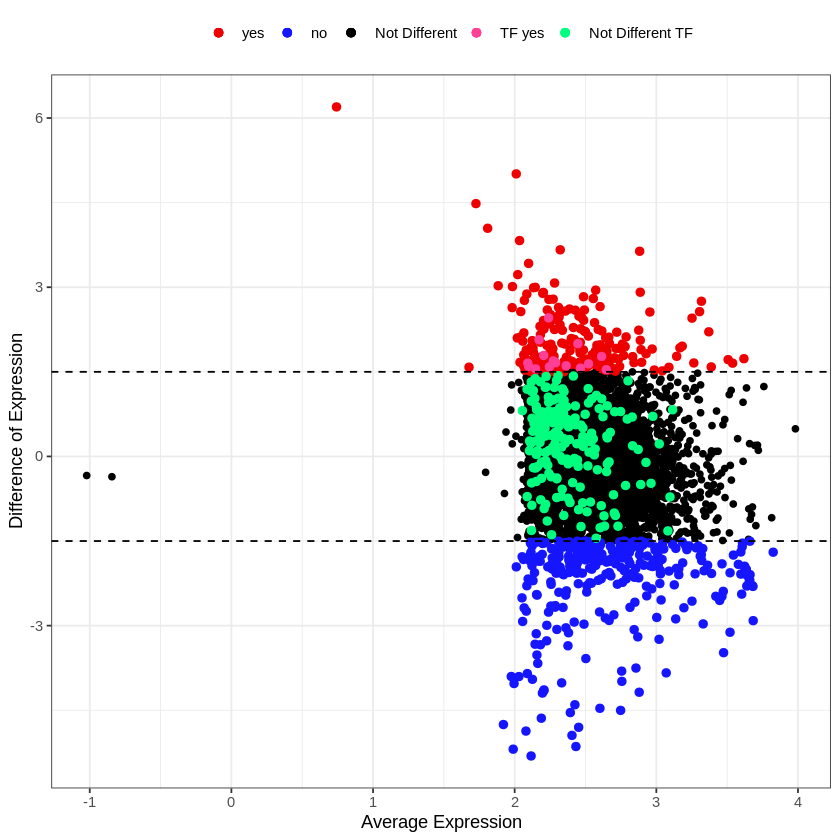

In [57]:
SmearPlot(object = out_pn, 
          diffMethod = 'Reverter', 
          lfc = 1.5, 
          conditions = c('yes', 'no'), 
          type = "DE")

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
i The deprecated feature was likely used in the CeTF package.
  Please report the issue to the authors."


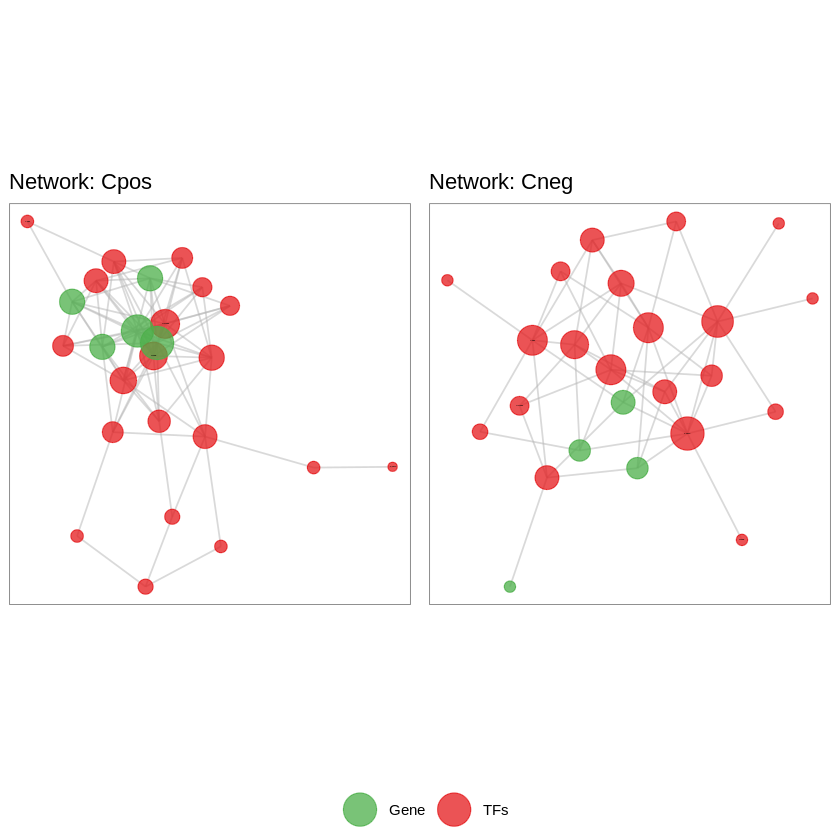

In [58]:
netConditionsPlot(out_pn)

In [59]:
# Accessing the network for condition 1
genes_pn <- unique(c(as.character(NetworkData(out_pn, "network1")[, "gene1"]), 
                  as.character(NetworkData(out_pn, "network1")[, "gene2"])))

# Performing getGroupGO analysis
cond1_pn <- getGroupGO(genes = genes_pn, 
                    ont = "BP", 
                    keyType = "SYMBOL", 
                    annoPkg = org.Mm.eg.db, 
                    level = 3)

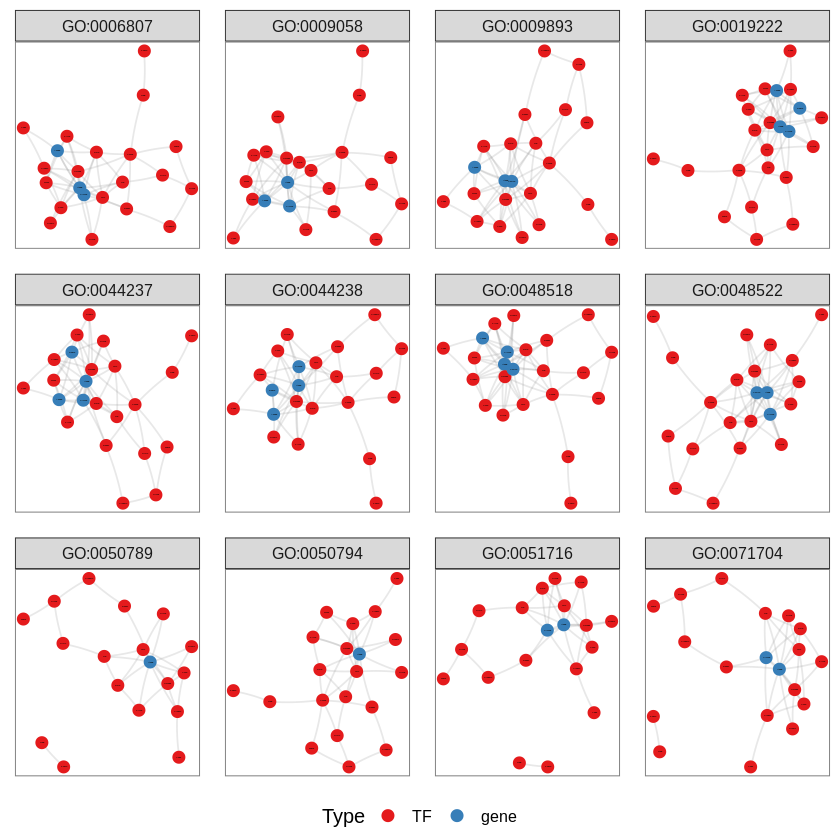

In [61]:
# Subsetting only the first 12 Ontologies with more counts
t1_pn <- head(cond1_pn$results, 12)

# Subsetting the network for the conditions to make available only the 12 nodes subsetted
t2_pn <- subset(cond1_pn$netGO, cond1_pn$netGO$gene1 %in% as.character(t1_pn[, "ID"]))

# generating the GO plot grouping by pathways
pt_pn <- netGOTFPlot(netCond = NetworkData(out_pn, "network1") %>% 
                    mutate(across(everything(), as.character)),
                  resultsGO = t1_pn,
                  netGO = t2_pn,
                  anno = NetworkData(out_pn, "annotation"),
                  groupBy = 'pathways',
                  type = 'GO')
pt_pn$plot

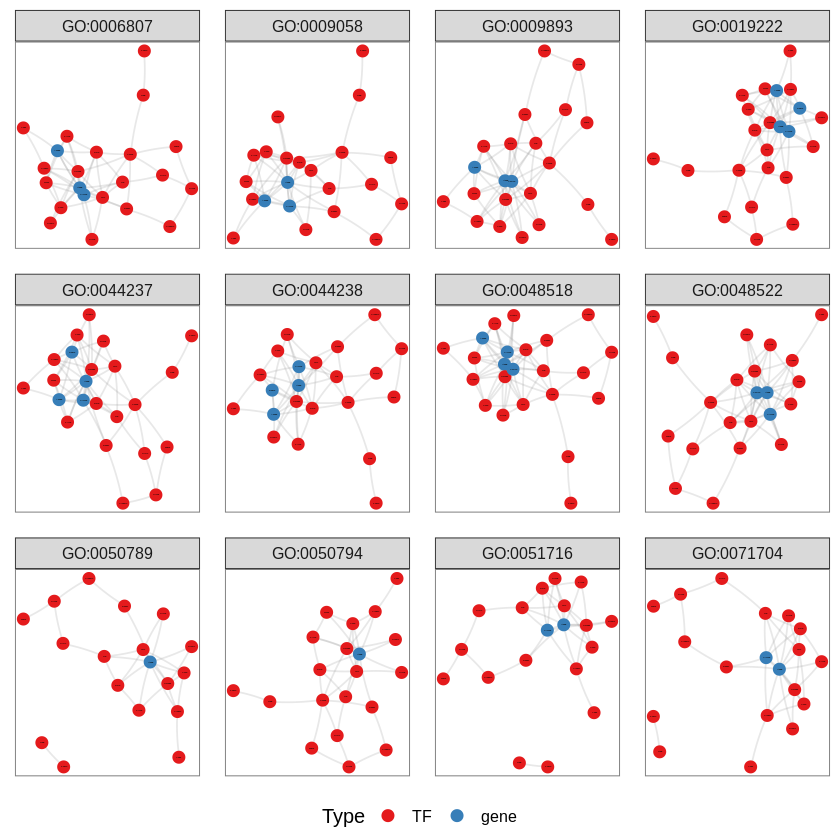

In [62]:
TFs_pn <- NetworkData(out_pn, "keytfs")$TF
pt_full_pn <- netGOTFPlot(netCond = NetworkData(out_pn, "network1"),
                  resultsGO = t1_pn,
                  netGO = t2_pn,
                  anno = NetworkData(out_pn, "annotation"),
                  groupBy = 'TFs',
                  TFs = TFs_pn, 
                  type = 'GO')
pt_pn$plot

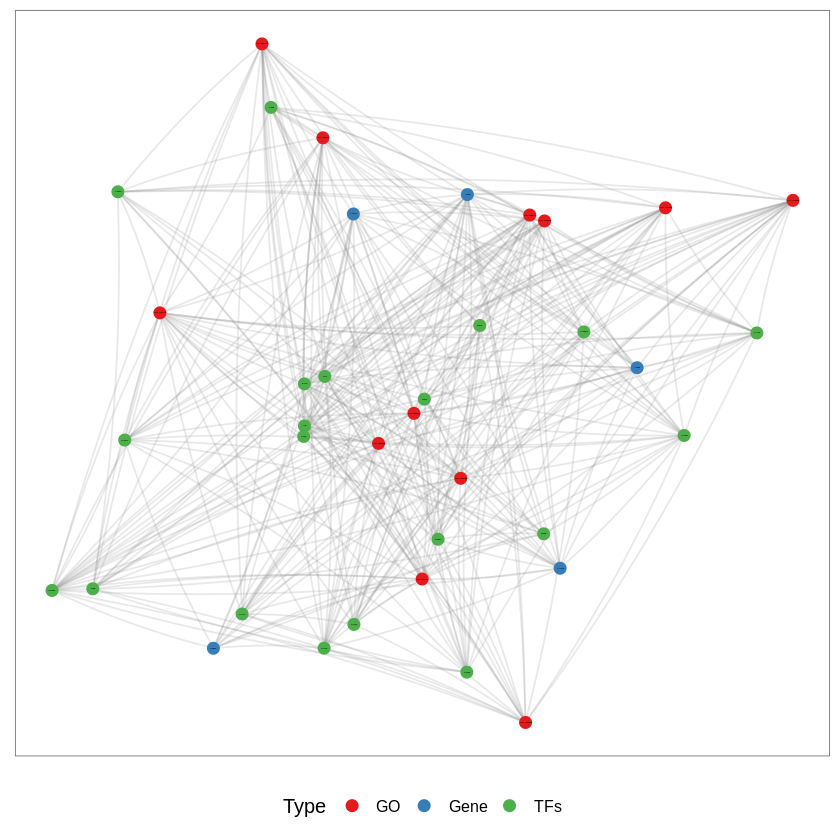

In [63]:
pt_pn <- netGOTFPlot(netCond = NetworkData(out_pn, "network1") %>% 
                   mutate(across(everything(), as.character)),
                  netGO = t2_pn,
                  keyTFs = NetworkData(out_pn, "keytfs"), 
                  type = 'Integrated')

pt_pn$plot

In [64]:
genes_pn <- unique(c(as.character(NetworkData(out_pn, "network1")[, "gene1"]), 
                  as.character(NetworkData(out_pn, "network1")[, "gene2"])))

In [65]:
cond1_pn <- getEnrich(genes = genes_pn, organismDB = org.Mm.eg.db, 
                  keyType = 'SYMBOL', ont = 'BP', fdrMethod = "BH", 
                  fdrThr = 0.01, minGSSize = 5, maxGSSize = 500)

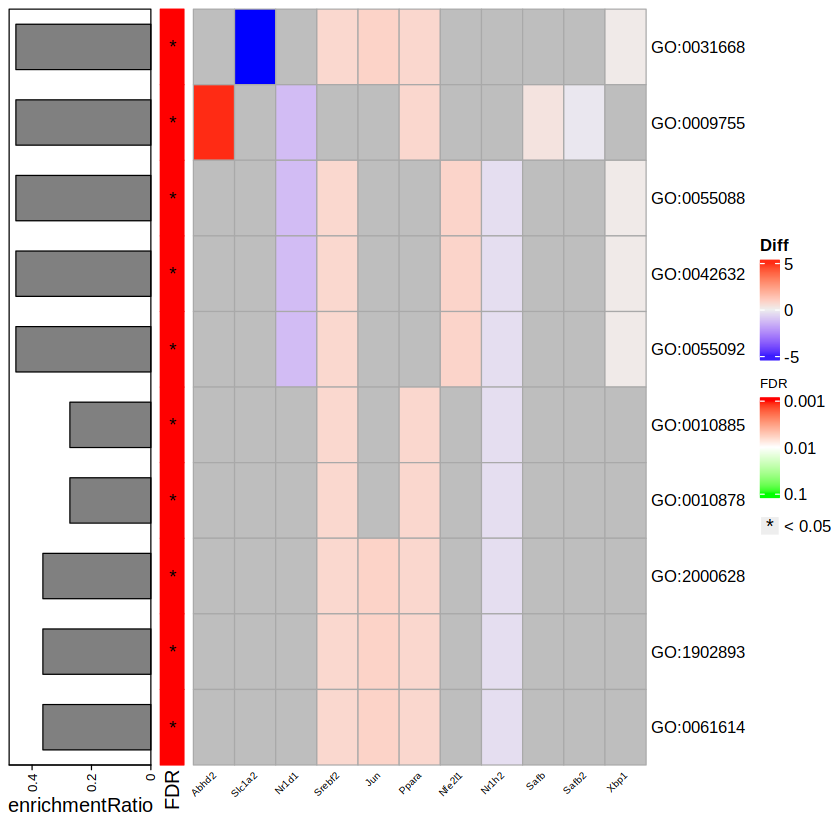

In [22]:
heatPlot(res = cond1_pn$results,
         diff = getDE(out_pn, "all"))

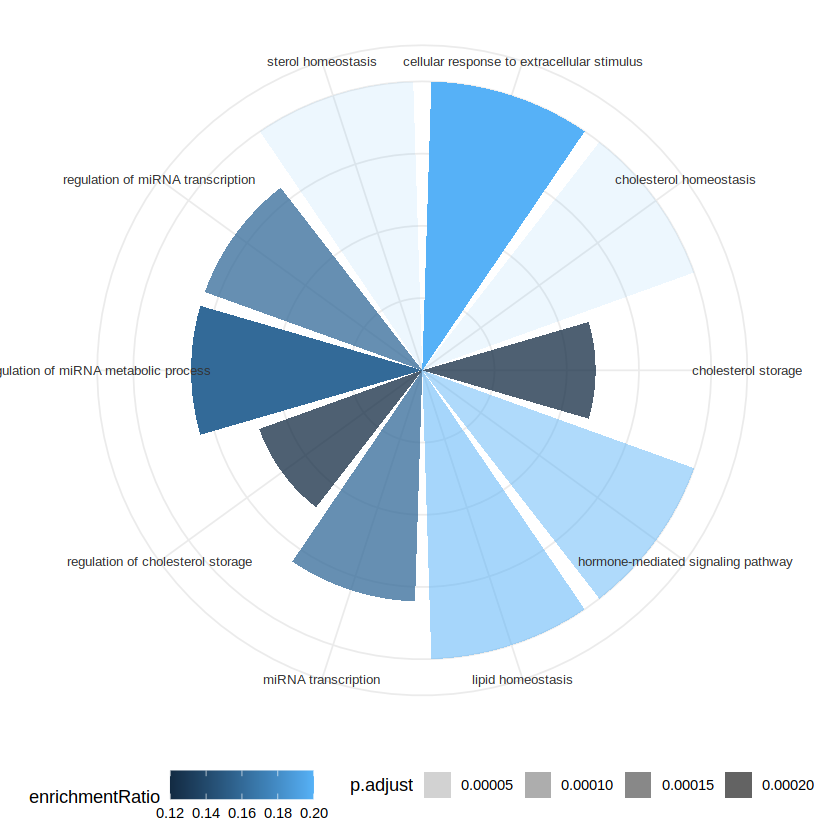

In [23]:
enrichPlot(res = cond1_pn$results,
           type = "circle")

### Cirrhosis vs Negative #cn

In [142]:
counts_cn <- as.data.frame(colData(dds))
counts_cn <- assay(dds)
counts_cn <- counts_cn[, order(dds$isCirrhotic, decreasing = TRUE)]

In [143]:
out_cn <- runAnalysis(mat = counts_cn, 
                   conditions=c("yes", "no"),
                   lfc = 5,
                   padj = 0.01,
                   TFs = TFs,
                   nSamples1 = 36,
                   nSamples2= 12,
                   tolType = "mean",
                   diffMethod = "Reverter", 
                   data.type = "counts")

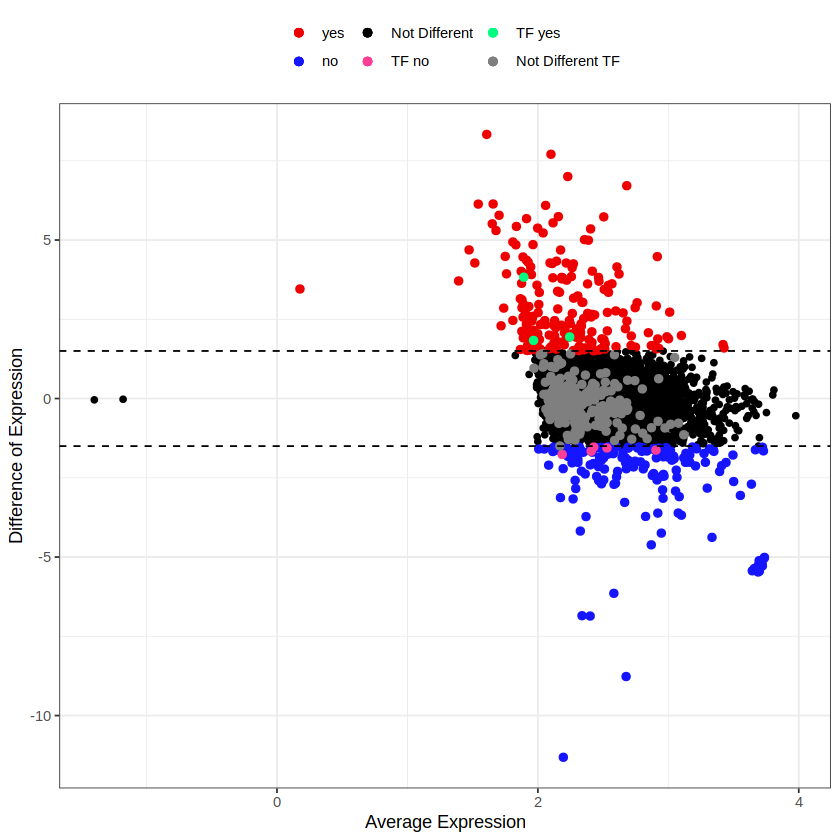

In [145]:
SmearPlot(object = out_cn, 
          diffMethod = 'Reverter', 
          lfc = 1.5, 
          conditions = c('yes', 'no'), 
          type = "DE")

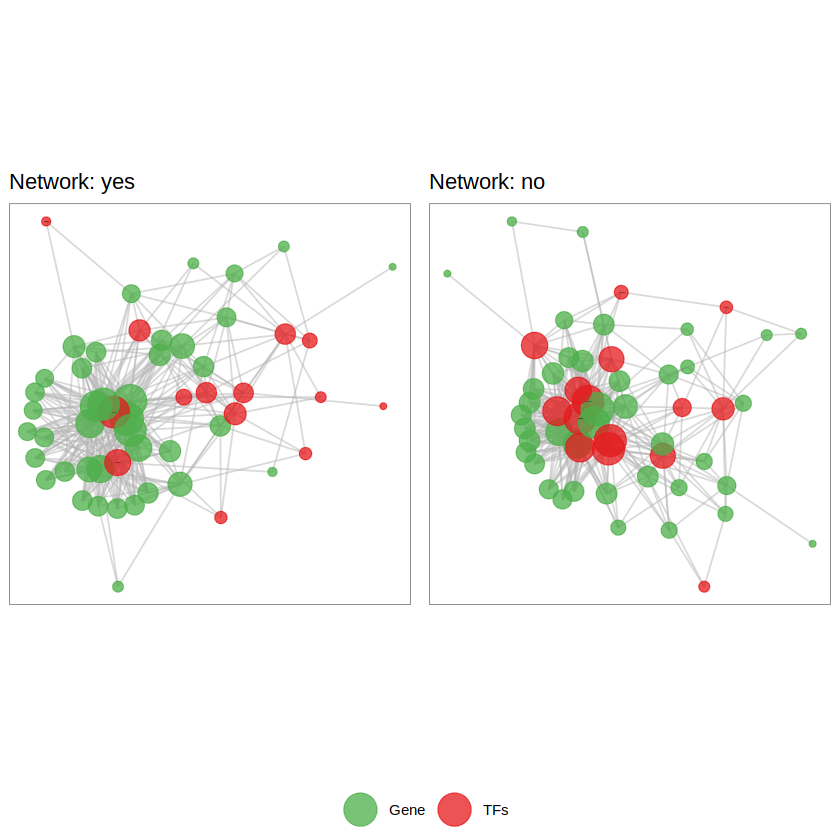

In [146]:
netConditionsPlot(out_cn)

In [147]:
# Accessing the network for condition 1
genes_cn <- unique(c(as.character(NetworkData(out_cn, "network1")[, "gene1"]), 
                  as.character(NetworkData(out_cn, "network1")[, "gene2"])))

# Performing getGroupGO analysis
cond1_cn <- getGroupGO(genes = genes_cn, 
                    ont = "BP", 
                    keyType = "SYMBOL", 
                    annoPkg = org.Mm.eg.db, 
                    level = 3)

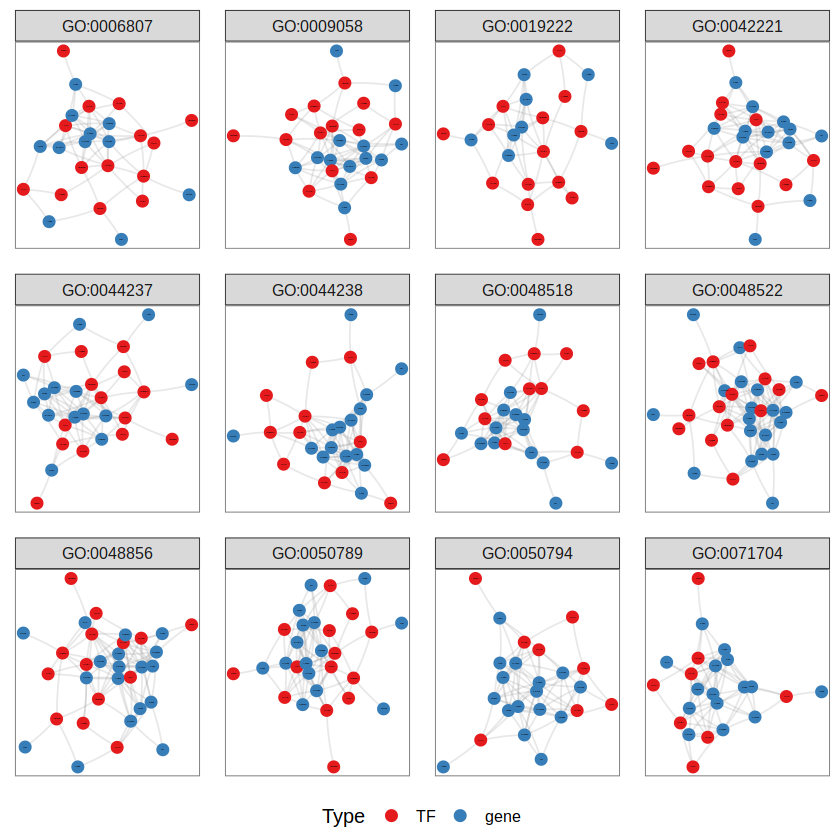

In [148]:
# Subsetting only the first 12 Ontologies with more counts
t1_cn <- head(cond1_cn$results, 12)

# Subsetting the network for the conditions to make available only the 12 nodes subsetted
t2_cn <- subset(cond1_cn$netGO, cond1_cn$netGO$gene1 %in% as.character(t1_cn[, "ID"]))

# generating the GO plot grouping by pathways
pt_cn <- netGOTFPlot(netCond = NetworkData(out_cn, "network1") %>% 
                    mutate(across(everything(), as.character)),
                  resultsGO = t1_cn,
                  netGO = t2_cn,
                  anno = NetworkData(out_cn, "annotation"),
                  groupBy = 'pathways',
                  type = 'GO')
pt_cn$plot

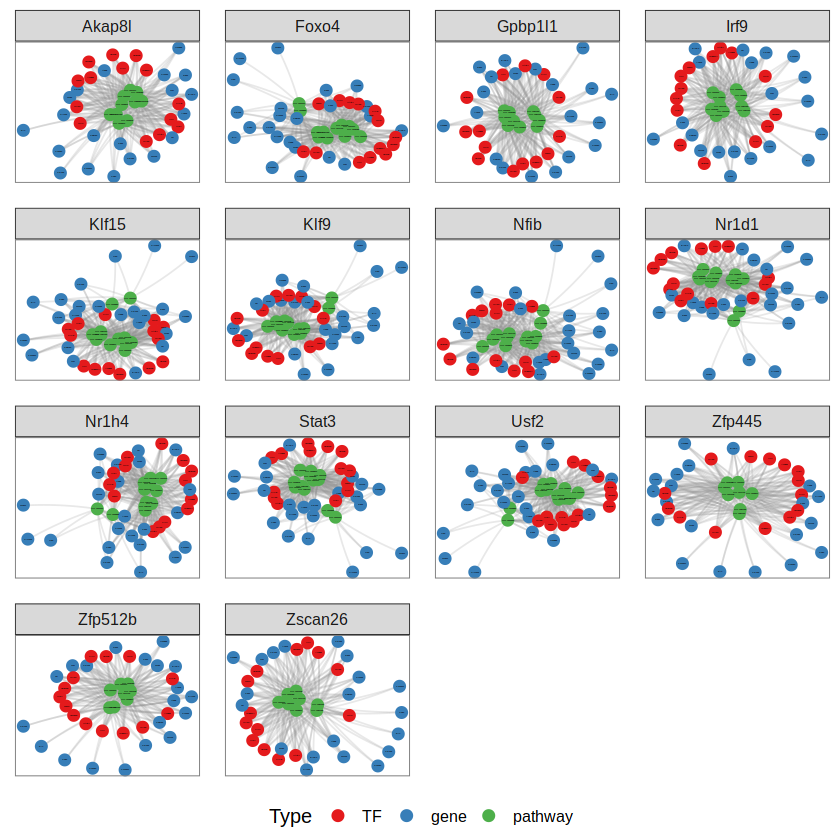

In [149]:
TFs_cn <- NetworkData(out_cn, "keytfs")$TF
pt_cn <- netGOTFPlot(netCond = NetworkData(out_cn, "network1"),
                  resultsGO = t1_cn,
                  netGO = t2_cn,
                  anno = NetworkData(out_cn, "annotation"),
                  groupBy = 'TFs',
                  TFs = TFs_cn, 
                  type = 'GO')
pt_cn$plot

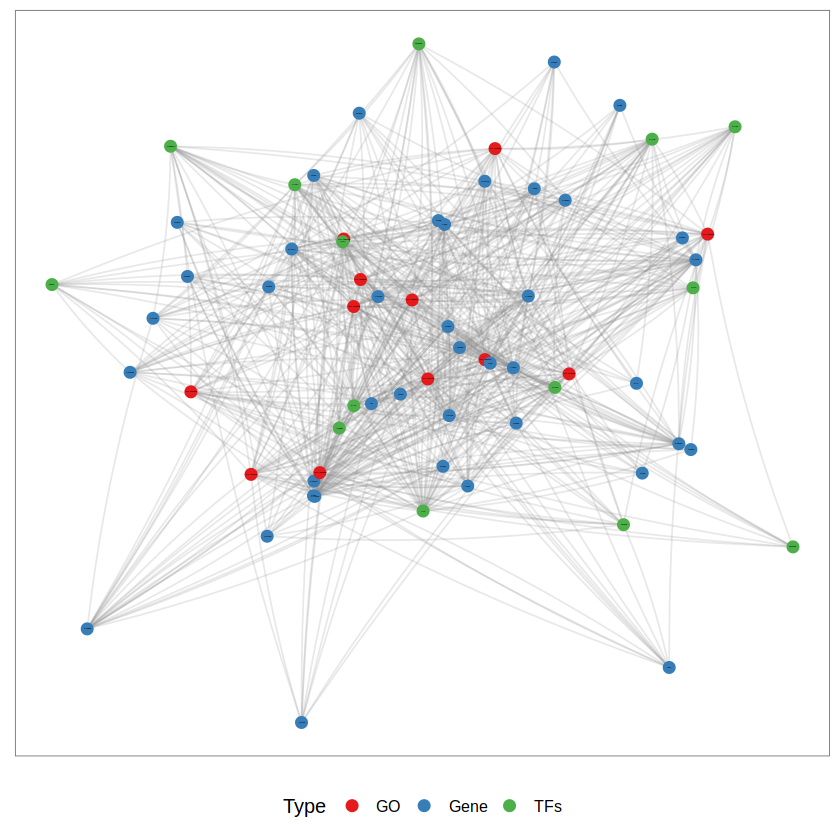

In [150]:
pt_cn <- netGOTFPlot(netCond = NetworkData(out_cn, "network1") %>% 
                   mutate(across(everything(), as.character)),
                  netGO = t2_cn,
                  keyTFs = NetworkData(out_cn, "keytfs"), 
                  type = 'Integrated')

pt_cn$plot

In [151]:
genes_cn <- unique(c(as.character(NetworkData(out_cn, "network1")[, "gene1"]), 
                  as.character(NetworkData(out_cn, "network1")[, "gene2"])))

In [152]:
cond1_cn <- getEnrich(genes = genes_cn, organismDB = org.Mm.eg.db, 
                  keyType = 'SYMBOL', ont = 'BP', fdrMethod = "BH", 
                  fdrThr = 0.01, minGSSize = 5, maxGSSize = 500)

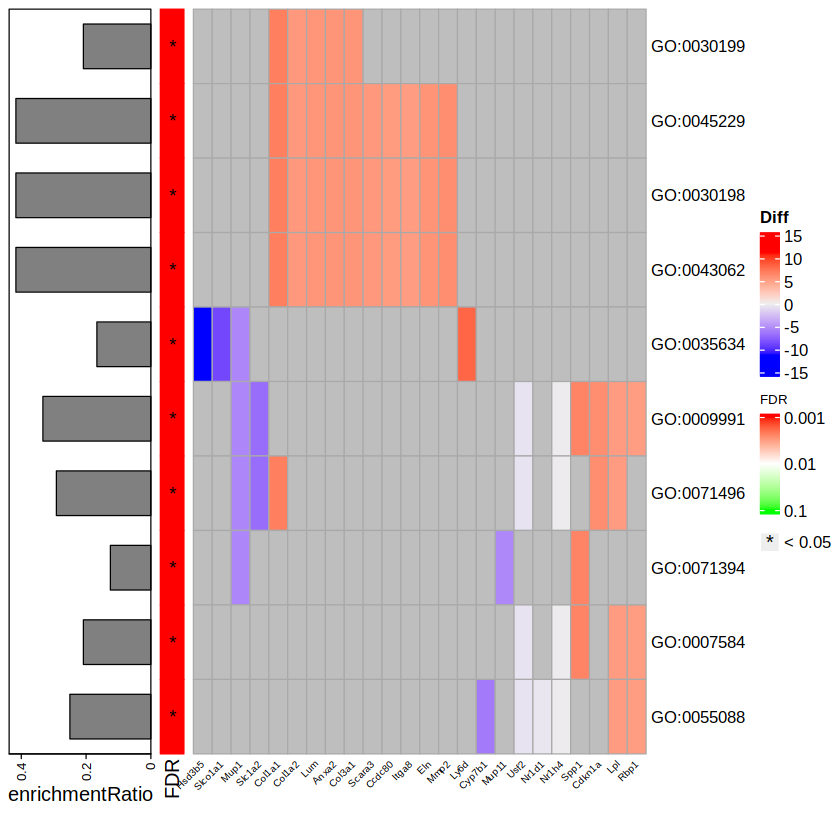

In [153]:
heatPlot(res = cond1_cn$results,
         diff = getDE(out_cn, "all"))

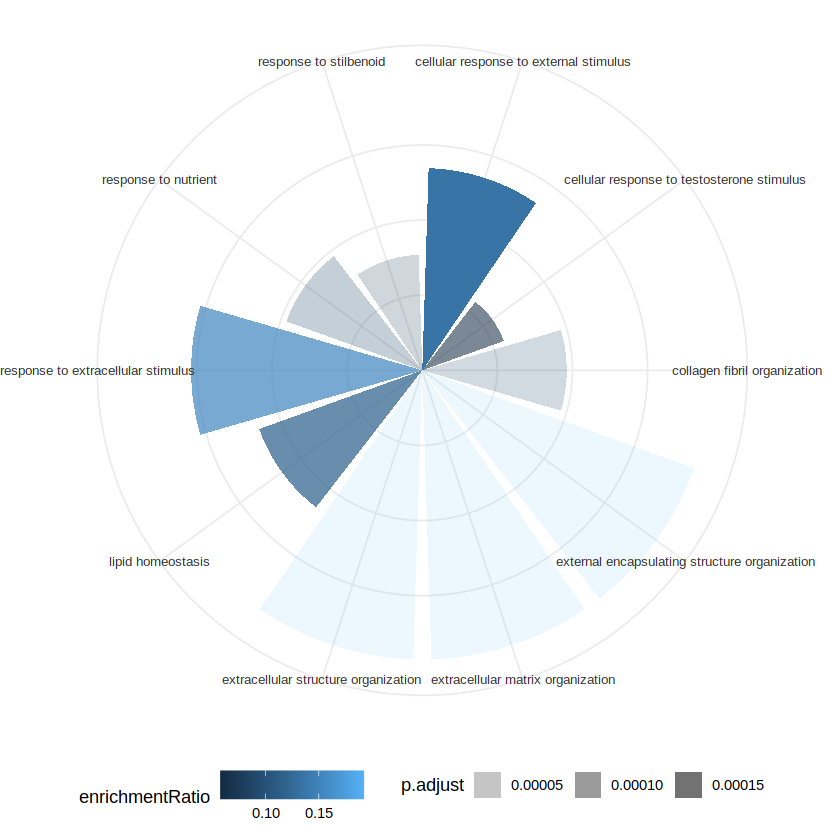

In [154]:
enrichPlot(res = cond1_cn$results,
           type = "circle")

### Regression vs Positive #rp

In [126]:
counts_rp <- as.data.frame(colData(dds))
counts_rp <- assay(dds)
reg_id <- c("CDL_0036","CDL_0037","CDL_0038","CDL_0039","CDL_0040","CDL_0041","CDL_0044","CDL_0045","CDL_0046","CDL_0048","CDL_0049","CDL_0050","CDL_0052","CDL_0054","CDL_0055","CDL_0056","CDL_0057","CDL_0058","CDL_0116","CDL_0117","CDL_0118","CDL_0120","CDL_0121","CDL_0123","CDL_0124","CDL_0125","CDL_0126","CDL_0127","CDL_0128","CDL_0131","CDL_0132","CDL_0133","CDL_0134","CDL_0135","CDL_0137","CDL_0138")
counts_rp <- as.data.frame(counts_rp) %>% dplyr::select(all_of(reg_id)) %>% as.matrix()
#counts_rp <- counts_rp[, order(dds$Regression, decreasing = TRUE)]

In [127]:
conditions_rp <- c("regression", "positive")

In [128]:
out_rp <- runAnalysis(mat = counts_rp, 
                   conditions = conditions_rp,
                   lfc = 5,
                   padj = 0.01,
                   TFs = TFs,
                   nSamples1 = 12,
                   nSamples2= 24,
                   tolType = "mean",
                   diffMethod = "Reverter", 
                   data.type = "counts")

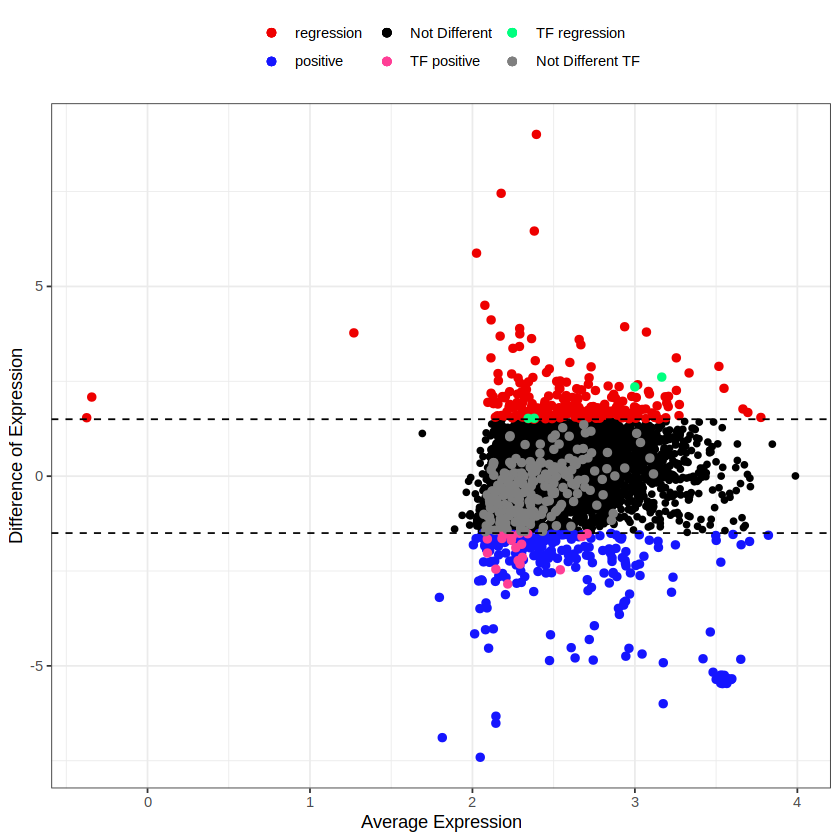

In [130]:
SmearPlot(object = out_rp, 
          diffMethod = 'Reverter', 
          lfc = 1.5, 
          conditions = conditions_rp,
          type = "DE")

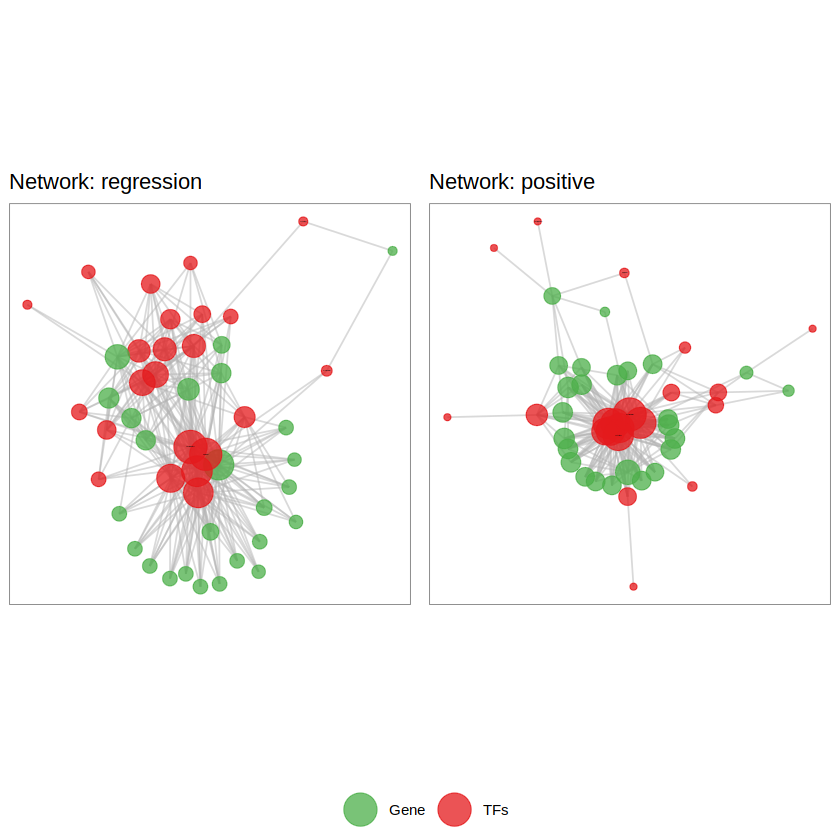

In [132]:
netConditionsPlot(out_rp)

In [133]:
# Accessing the network for condition 1
genes_rp <- unique(c(as.character(NetworkData(out_rp, "network1")[, "gene1"]), 
                  as.character(NetworkData(out_rp, "network1")[, "gene2"])))

# Performing getGroupGO analysis
cond1_rp <- getGroupGO(genes = genes_rp, 
                    ont = "BP", 
                    keyType = "SYMBOL", 
                    annoPkg = org.Mm.eg.db, 
                    level = 3)

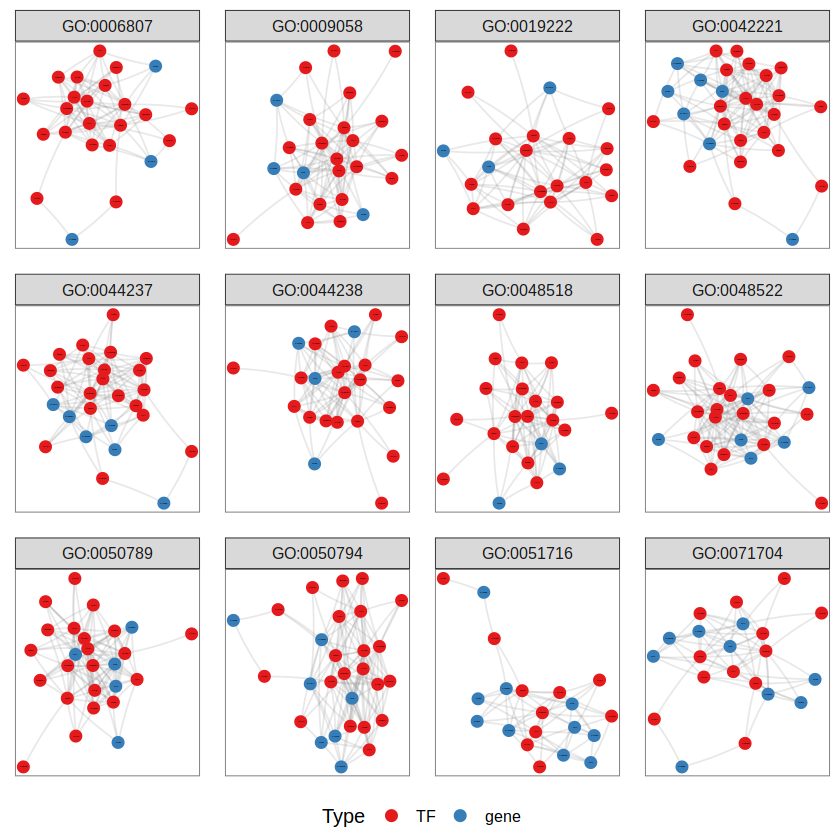

In [134]:
# Subsetting only the first 12 Ontologies with more counts
t1_rp <- head(cond1_rp$results, 12)

# Subsetting the network for the conditions to make available only the 12 nodes subsetted
t2_rp <- subset(cond1_rp$netGO, cond1_rp$netGO$gene1 %in% as.character(t1_rp[, "ID"]))

# generating the GO plot grouping by pathways
pt_rp <- netGOTFPlot(netCond = NetworkData(out_rp, "network1") %>% 
                    mutate(across(everything(), as.character)),
                  resultsGO = t1_rp,
                  netGO = t2_rp,
                  anno = NetworkData(out_rp, "annotation"),
                  groupBy = 'pathways',
                  type = 'GO')
pt_rp$plot

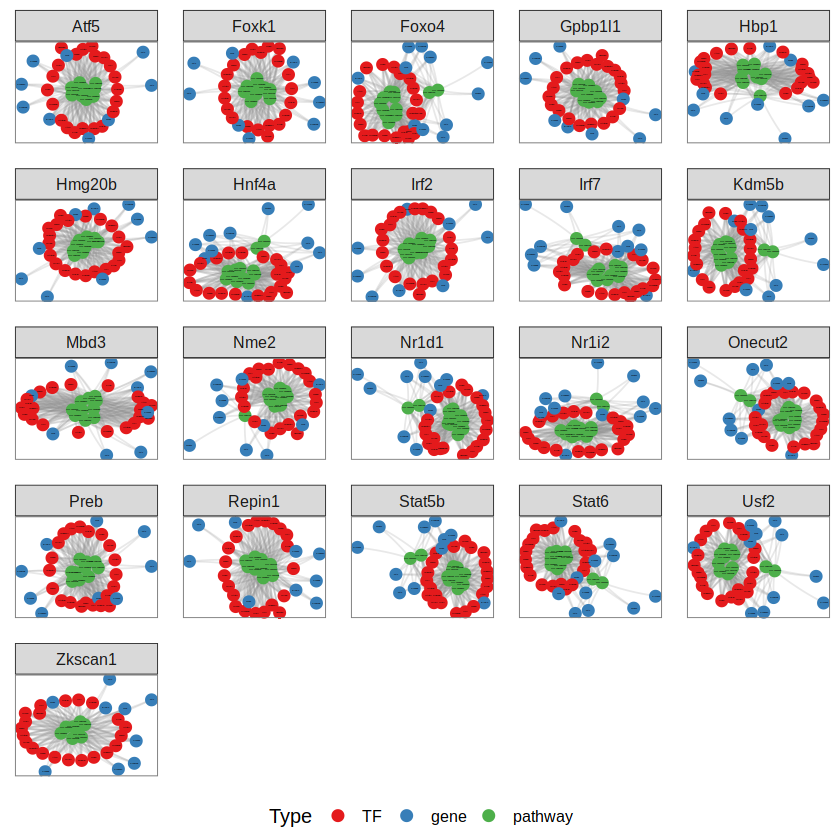

In [135]:
TFs_rp <- NetworkData(out_rp, "keytfs")$TF
pt_rp <- netGOTFPlot(netCond = NetworkData(out_rp, "network1"),
                  resultsGO = t1_rp,
                  netGO = t2_rp,
                  anno = NetworkData(out_rp, "annotation"),
                  groupBy = 'TFs',
                  TFs = TFs_rp, 
                  type = 'GO')
pt_rp$plot

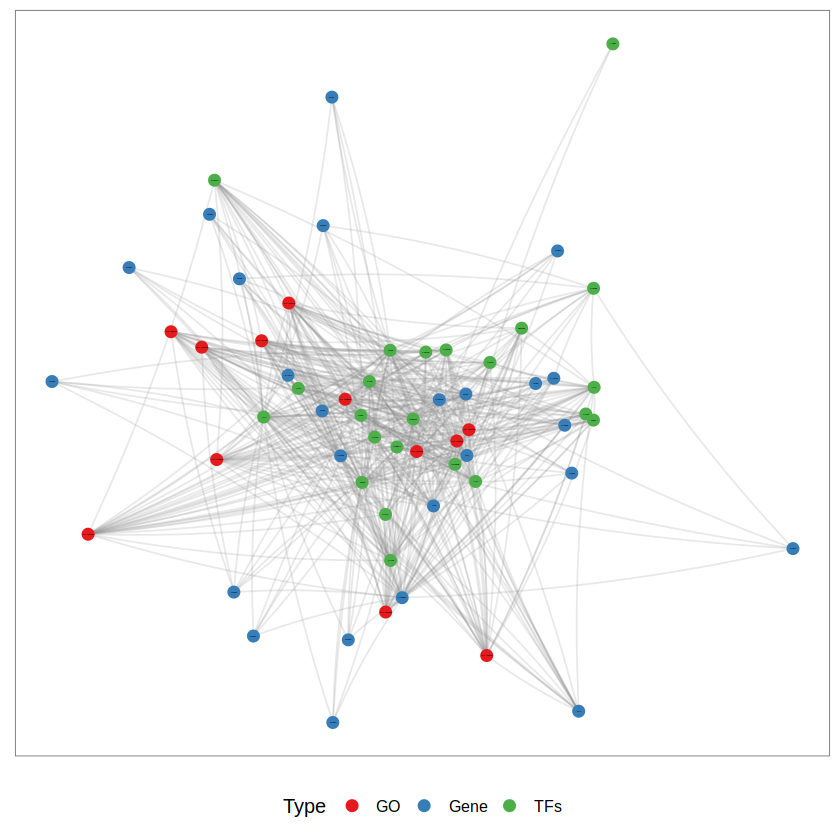

In [136]:
pt_rp <- netGOTFPlot(netCond = NetworkData(out_rp, "network1") %>% 
                   mutate(across(everything(), as.character)),
                  netGO = t2_rp,
                  keyTFs = NetworkData(out_rp, "keytfs"), 
                  type = 'Integrated')

pt_rp$plot

In [137]:
genes_rp <- unique(c(as.character(NetworkData(out_rp, "network1")[, "gene1"]), 
                  as.character(NetworkData(out_rp, "network1")[, "gene2"])))

In [138]:
cond1_rp <- getEnrich(genes = genes_rp, organismDB = org.Mm.eg.db, 
                  keyType = 'SYMBOL', ont = 'BP', fdrMethod = "BH", 
                  fdrThr = 0.01, minGSSize = 5, maxGSSize = 500)

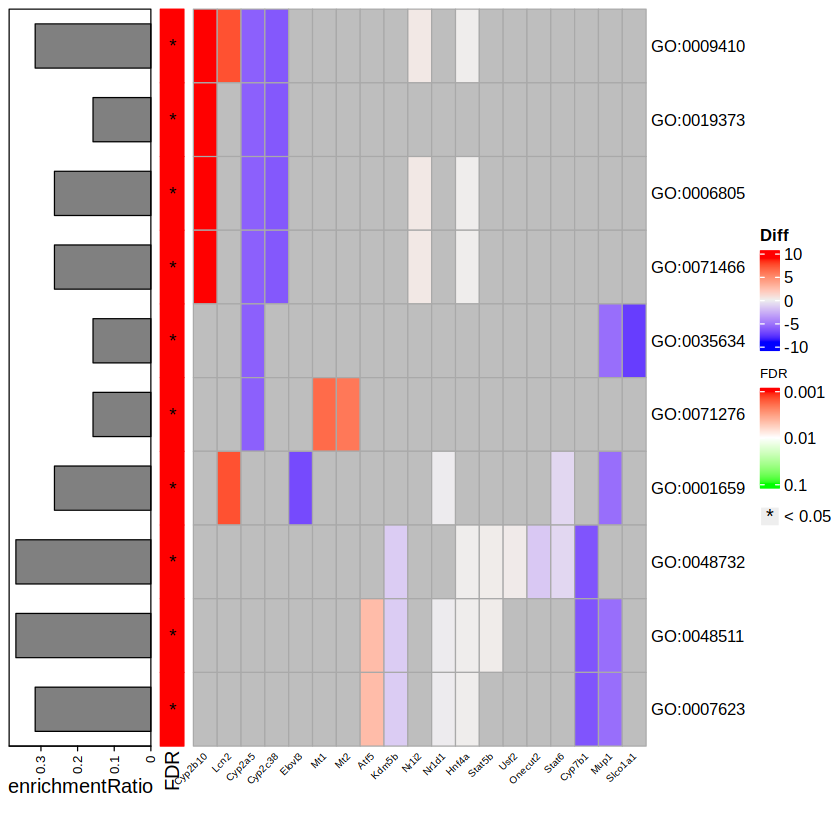

In [139]:
heatPlot(res = cond1_rp$results,
         diff = getDE(out_rp, "all"))

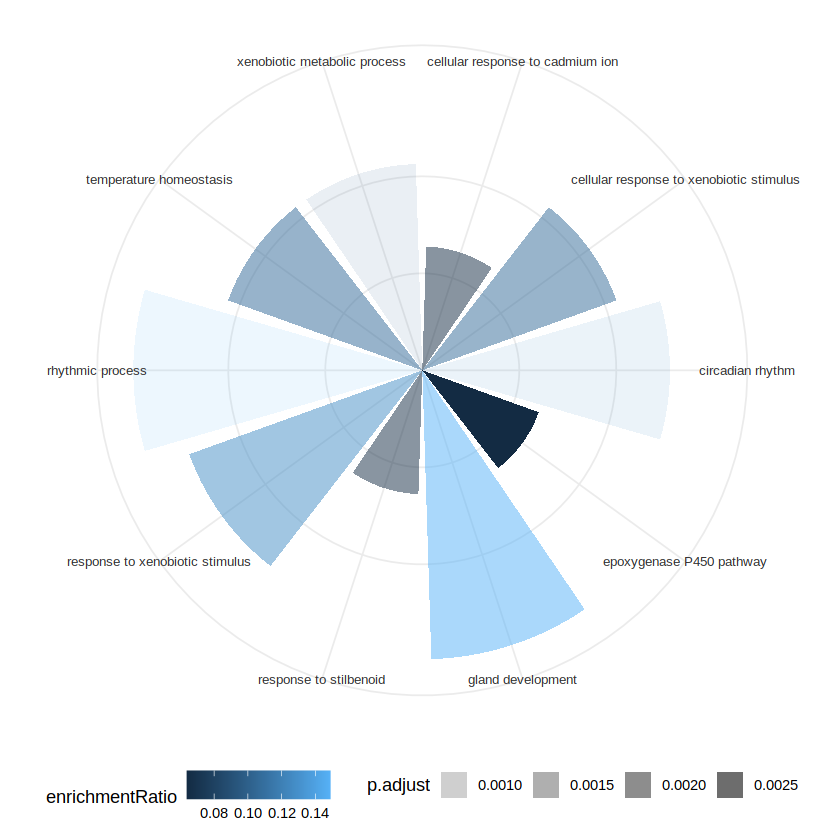

In [140]:
enrichPlot(res = cond1_rp$results,
           type = "circle")

### Summary

In [166]:
TFs_combined <- c(TFs_pn, TFs_cn, TFs_rp)

## GENIE3 score

In [7]:
tfs <- read.csv(file = "03_outputs/13/combined_transcription_factors.csv", row.names = 1)

In [8]:
tfs <- unique(tfs$x)

In [9]:
priority_targets <- read.csv(file = "03_outputs/08/intersection_genes.csv")

In [10]:
t_pp <- priority_targets %>% filter(module == "PP")
t_cpa <- priority_targets %>% filter(module == "CPA")
t_cir <- priority_targets %>% filter(module == "Cirrhosis")
t_reg <- priority_targets %>% filter(module == "Regression")

In [11]:
weightMat_pp <- GENIE3(counts(dds), regulators = tfs, targets = t_pp$genes, nCores = 10, treeMethod="ET")
weightMat_cpa <- GENIE3(counts(dds), regulators = tfs, targets = t_cpa$genes, nCores = 10, treeMethod="ET")
weightMat_cir <- GENIE3(counts(dds), regulators = tfs, targets = t_cir$genes, nCores = 10, treeMethod="ET")
weightMat_reg <- GENIE3(counts(dds), regulators = tfs, targets = t_reg$genes, nCores = 10, treeMethod="ET")

In [12]:
links_pp <- getLinkList(weightMat_pp, threshold=0.05)
links_cpa <- getLinkList(weightMat_cpa, threshold=0.05)
links_cir <- getLinkList(weightMat_cir, threshold=0.05)
links_reg <- getLinkList(weightMat_reg, threshold=0.05)

In [13]:
tf_score_pp <- links_pp %>% group_by(regulatoryGene) %>% mutate(tf_score_pp = sum(weight)) %>% arrange(desc(tf_score_pp)) %>% ungroup() %>% dplyr::select(regulatoryGene, tf_score_pp, targetGene) %>% distinct()
tf_score_cpa <- links_cpa %>% group_by(regulatoryGene) %>% mutate(tf_score_cpa = sum(weight)) %>% arrange(desc(tf_score_cpa)) %>% ungroup() %>% dplyr::select(regulatoryGene, tf_score_cpa, targetGene) %>% distinct()
tf_score_cir <- links_cir %>% group_by(regulatoryGene) %>% mutate(tf_score_cir = sum(weight)) %>% arrange(desc(tf_score_cir)) %>% ungroup() %>% dplyr::select(regulatoryGene, tf_score_cir, targetGene) %>% distinct()
tf_score_reg <- links_reg %>% group_by(regulatoryGene) %>% mutate(tf_score_reg = sum(weight)) %>% arrange(desc(tf_score_reg)) %>% ungroup() %>% dplyr::select(regulatoryGene, tf_score_reg, targetGene) %>% distinct()

In [14]:
tfs_scored_combined <- merge(tf_score_pp, tf_score_cpa, by = c("regulatoryGene", "targetGene"), all = TRUE) %>% 
                       merge(., tf_score_cir,by = c("regulatoryGene", "targetGene"), all = TRUE) %>% 
                       merge(., tf_score_reg, by = c("regulatoryGene", "targetGene"), all = TRUE)


## Outputs

In [169]:
write.csv(TFs_combined, file = "03_outputs/13/combined_transcription_factors.csv")

In [16]:
write.csv(tfs_scored_combined, file = "03_outputs/13/tfs_scored.csv", quote = FALSE)